In [21]:
experiment_dir = "../../demos/mlp_randomized_Thu_Oct_14_18-07-56_2021"
dir_depth      = 4

import os
import json
import numpy as np

data   = []
config = {}

# Load everything
for dirpath,dirnames,filenames in os.walk(experiment_dir):
    numpy_files = filter(lambda s : s.endswith('.npy' ), filenames )
    json_files  = filter(lambda s : s.endswith('.json'), filenames )
    # Json files
    for filename in json_files:
        full_path = os.path.join(dirpath, filename)
        config = json.load( open(full_path) )
    # Numpy files
    for filename in numpy_files:
        full_path = os.path.join(dirpath, filename)
        split_path = full_path.split('/')
        split_path = split_path[dir_depth:]
        element = {
            'path': split_path,
            '.ext': 'npy',
            'data': np.load(full_path)
        }
        data.append( element )

# Peel layers
def peel(data_list):
    result = {}
    # Find keys
    keys = [e['path'][0] for e in data_list]
    keys = set(keys)
    # Peel
    for k in keys:
        elements = [e for e in data_list if e['path'][0]==k]
        for e in elements:
            e['path'] = e['path'][0:]
        if len( elements ) > 1:
            pass
        else:
            elements = elements[0]
        result[k] = elements
    #
    for k in keys:
        elements = result[k]
        if k.endswith('.npy'):
            result[k] = elements['data']
        else:
            for e in elements:
                e['path'] = e['path'][1:]
            result[k] = peel( result[k] )        
    #
    return result

peeled_data = peel(data)

# Print tree structure
for k1 in peeled_data:
    print(k1)
    if k1.endswith('.npy'):
        pass
    else:
        for k2 in sorted(peeled_data[k1]):
            print("  |- ", k2)
#

learning_curve_test.npy
biases
  |-  layer_0
  |-  layer_2
  |-  layer_4
  |-  layer_6
weights
  |-  layer_0
  |-  layer_2
  |-  layer_4
  |-  layer_6
biases_gradients
  |-  layer_0
  |-  layer_2
  |-  layer_4
  |-  layer_6
learning_curve_train.npy
weights_gradients
  |-  layer_0
  |-  layer_2
  |-  layer_4
  |-  layer_6


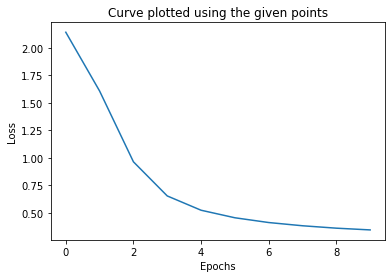

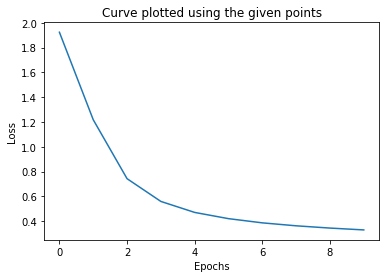

In [22]:
import matplotlib.pyplot as plt
 
# Plotting the loss on the training set
plt.plot(peeled_data["learning_curve_train.npy"])
plt.title("Curve plotted using the given points")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Plotting the loss on the testing set
plt.plot(peeled_data["learning_curve_test.npy"])
plt.title("Curve plotted using the given points")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [23]:
# Join numpy arrays
numpy_data = {}
for k1 in peeled_data:       # Level 1:
    if k1.endswith('.npy'):
        pass
    else:
        print(k1)
        numpy_data[k1] = {}
        for k2 in sorted(peeled_data[k1]):
            print("  |- ", k2)
            layer_series = {}
            for k3 in sorted(peeled_data[k1][k2]):
                index = int( k3.split('.')[0] )
                layer_series[index] = peeled_data[k1][k2][k3] 
            layer_series = dict( sorted(layer_series.items(), key = lambda i: i[0]) )
            indices = list(layer_series.keys())
            series  = np.stack( list(layer_series.values()) )
            #print( "     Number of batches: ", len(indices) )
            #print( series.shape )
            numpy_data[k1][k2] = { 'layer': k2[-1],
                                   'indices': indices,
                                   'series' : series }

biases
  |-  layer_0
  |-  layer_2
  |-  layer_4
  |-  layer_6
weights
  |-  layer_0
  |-  layer_2
  |-  layer_4
  |-  layer_6
biases_gradients
  |-  layer_0
  |-  layer_2
  |-  layer_4
  |-  layer_6
weights_gradients
  |-  layer_0
  |-  layer_2
  |-  layer_4
  |-  layer_6


Computing stability series for each layer...
Layer:  0


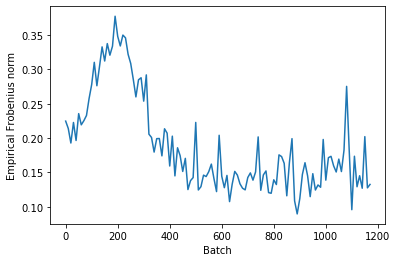


Layer:  2


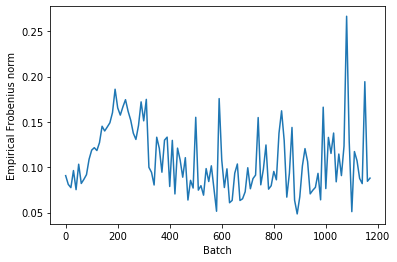


Layer:  4


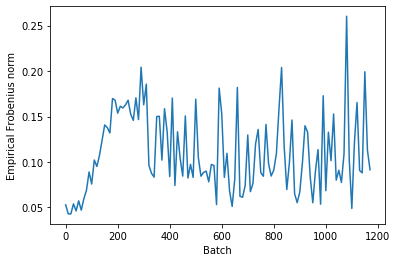


Layer:  6


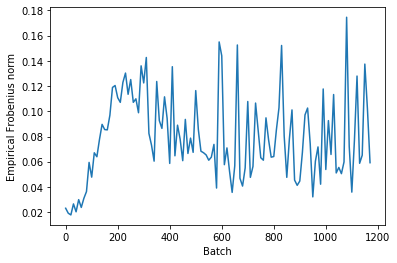

In [32]:
weights_gradients = list( numpy_data['weights_gradients'].values() )
#
print("Computing stability series for each layer...")
for layer_data in weights_gradients:
    print( "Layer: ", layer_data['layer'])
    series = layer_data['series']
    layer_data['norm'] = np.linalg.norm( series, ord="fro", axis=(1,2) )**2
    # Plotting the frobenius norm
    plt.plot( layer_data['indices'], layer_data['norm'] )
    plt.xlabel("Batch")
    plt.ylabel("Empirical Frobenius norm")
    plt.show()
    print( "")

FileNotFoundError: [Errno 2] No such file or directory: '../demos/run_experiment.py'